# OPERATIONS ON NUMPY ARRAYS


+ [Arithematic Operations](#Arithematic_operations) 
+ [Broadcasting](#Broadcasting)
+ [Universal Functions](#Universal_functions)
+ [Set operations](#Set_operations)
+ [saving Arrays](#saving_arrays)

<a id='Arithematic_operations'></a> 

### Arithematic Operations 
Arithematic operations can be performed on NumPy arrays, these arithematic operations follows the standard Python arithematic operators on elementwise basis.

Wes McKinney puts it as:
>Arrays are important because they enable you to express batch operations on data without writing any for loops. This is usually called **vectorization**. Any arithmetic operations between equal-size arrays applies the operation elementwise.

While operations between differently sized arrays is called **broadcasting**.

The table below shows the artthimatic operators in NumPy.

Operator | Description
:- | :-
 + | Addition
 - | Subtraction
 * | Multiplication
 / | Division
// | Floor DIvision
% | Modulus / Remainder
 ** | Exponent
 
An arithmetic operation between any two arrays is always performed element-by-element. That is if you add two arrays, A and B, every ith element of A is added to the ith element of B to produce the array C
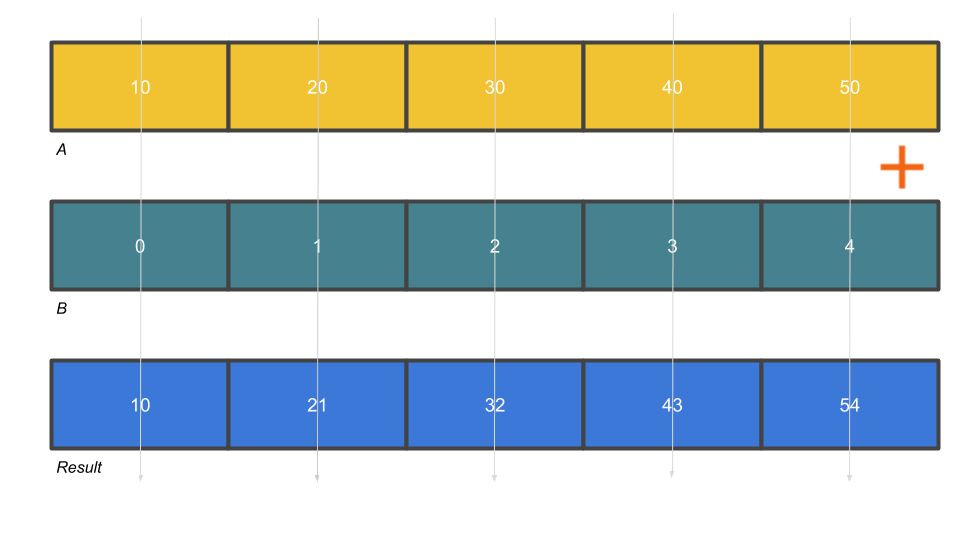
 
Lets first explore arithematic between Arrays of compatible size and shape 

In [1]:
import numpy as np
arr_1 = np.arange(5,46,5).reshape((3,3))
arr_1

array([[ 5, 10, 15],
       [20, 25, 30],
       [35, 40, 45]])

In [2]:
arr_2 = np.full((3,3),2)
arr_2

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

In [3]:
# Adding Two arrays together (array and array)
arr_1 + arr_2

array([[ 7, 12, 17],
       [22, 27, 32],
       [37, 42, 47]])

In [4]:
# Subtraction (Array and Array)
arr_1 - arr_2

array([[ 3,  8, 13],
       [18, 23, 28],
       [33, 38, 43]])

In [5]:
# Mod Division (Array and array)
arr_1 % arr_2

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]], dtype=int32)

In [6]:
# Multiplication (Array and Array)
arr_1 * arr_2

array([[10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [7]:
# Divison
arr_1 / arr_2

array([[ 2.5,  5. ,  7.5],
       [10. , 12.5, 15. ],
       [17.5, 20. , 22.5]])

In [8]:
# Floor Division
arr_1 // arr_2

array([[ 2,  5,  7],
       [10, 12, 15],
       [17, 20, 22]], dtype=int32)

In [9]:
# Exponent
arr_1 ** arr_2

array([[  25,  100,  225],
       [ 400,  625,  900],
       [1225, 1600, 2025]], dtype=int32)

<a id='Broadcasting'></a>  

### Broadcasting
**Broadcasting** refers to how arithematics works between arrays of different shapes,The simplest form of broadcasting is arithematics between a scalar value and an array object, where the scalar value is broadcasted over an array.

##### Array scalar broadcasting

In [10]:
arr = np.arange(1,10)
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
# Addition (array and scalar)
arr + 5

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14])

In [12]:
# Subtraction (array and scalar)
arr -1

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [13]:
# Multiplying (array and scalar)
arr * 5

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45])

In [14]:
# Mod division to get the remainder (array and scalar)
arr % 2

array([1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

In [15]:
# Floor division (array and scalar)
arr // 2

array([0, 1, 1, 2, 2, 3, 3, 4, 4], dtype=int32)

##### Array and Array broadcasting
But there are cases where we have to perform operations on two different arrays with different shapes. But as we ealier said, for us to perform operations the arrays should be compatible and the operations occur on elementwise basis. We leverage on the broadcasting concept where arrays have different shapes but based on broadcasting rules are still compatible for arithematic operations. 
An expression can contain arrays of unequal sizes, and the operation may still be well defined if the smaller array can be broadcasted to match the larger array accordimg to NumPys broadcasting rules, lets explore the rules of broadcasting

>>**Broadcasting Rule** states that In order to broadcast, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. The size of the trailing axes for both arrays in an operation must either be the same size or one of them must be one.
``simply Put Two arrays are compatible for broadcasting if for each trailing dimension (that is, starting from he end), The axis lengths match or if either of the lengths is 1. Broadcasting is then performed over the missing dimension  or the dimension with length 1.``

**broadcasting rule mechanism:**

*starting from the trailing dimension (i.e the right end ) and working towards the leading dimension (i.e the left begining)*
1. If the two arrays differ in their number of dimensions, the shape with fewer dimensions is padded with ones on its leading (left) side.
2. If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
3. If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

Lets explore examples for clarity

##### example 1.

In [16]:
# Two-dimensional array to a one-dimensional array:
x = np.ones((2, 3))
y = np.arange(3)

In [17]:
x

array([[1., 1., 1.],
       [1., 1., 1.]])

In [18]:
x.shape

(2, 3)

In [19]:
y

array([0, 1, 2])

In [20]:
y.shape

(3,)

1. By rule one the size of the trailing dimensions matches, so it proceeds to check the next dimension.
 + x.shape -> (2, 3)
 + y.shape -> (3,)
   
2. We see that array y has fewer dimensions. Since array y is a one-dimensional array, it does not have a leading dimension. So Numpy automatically broadcasts the value ‘1’ to the missing dimension in array y (pad it on the left with one).
 + x.shape -> (2, 3)
 + x.shape -> (1, 3)

3. Since the next dimension Numpy checks has one of its dimensions equal to 1, it is clear that the broadcasting rules are satisfactory and Numpy allows the arithmetic operation between the two arrays. but to totally  filfill rule 2, since  first dimension disagrees, so we stretch this dimension to match:
 + x.shape -> (2, 3)
 + y.shape -> (2, 3)

4. The shapes now match, and we see that the shape of the result to be (2, 3):



In [21]:
# arithematic (Broadcasting performed)
x + y

array([[1., 2., 3.],
       [1., 2., 3.]])

##### example 2.

In [22]:
# where both arrays will be broadcasted
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [23]:
a

array([[0],
       [1],
       [2]])

In [24]:
# Shape of a
a.shape

(3, 1)

In [25]:
b

array([0, 1, 2])

In [26]:
# Shape of b
b.shape

(3,)

In [27]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

##### example 3

In [28]:
# Now let's take a look at an example in which the two arrays are not compatible:
m = np.ones((3, 2))
n = np.arange(3)

In [29]:
m

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [30]:
# Shape of m
m.shape

(3, 2)

In [31]:
n

array([0, 1, 2])

In [32]:
# Shape of n
n.shape

(3,)

In [33]:
m + n

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

<a id='Universal_functions'></a>  

### Universal functions
``A universal function also Known as ufunc is a function that performs elementwise operations on data in ndarrays.you can think of them as fast vectorized wrappers for simple functions that take in one or more scalar values and produce one or more scalar results``
we can loosely categorize these universal functions as:
+ **unary universal functions**
+ **binary universal functions**


**Unary universal functions**: *f(x) A unary universal function is a mathematical function that only accepts one array and performs elementwise transformations on the array. it does this by mapping the function over the array - applying f(x) to each element within the array, and producing a new array as a result (i.e. the input array is not overwritten).*

Function | Description
:- | :-
np.abs(ndarray) | Calculate the absolute value element-wise.
np.exp(ndarray) | Calculate the exponential of all elements in the input array
np.sqrt(ndarray) | Return the non-negative square-root of an array, element-wise.
np.square(ndarray) | Return the element-wise square of the input
np.ceil(ndarray) | Return the ceiling of the input, element-wise (The ceil of the scalar `x` is the smallest integer `i`, such that
          | `i >= x`)
np.floor(ndarray) | Return the floor of the input, element-wise. (The floor of the scalar `x` is the largest integer `i`, such that
           |`i <= x`.)
np.rint(ndarray) | Round elements of the array to the nearest integer
np.isnan(ndarray) | Test element-wise for NaN and return result as a boolean array.
np.sin(ndarray) | Trigonometric sine, element-wise.
np.cos(ndarray) | Cosine element-wise.
np.tan(ndarray) | Compute tangent element-wise.
np.log(ndarray) | Natural logarithm, element-wise.
np.reciprocal(ndarray) | Return the reciprocal of the argument, element-wise.

In [34]:
arr_2d= np.arange(-50,50,2).reshape(5,10)
arr_2d

array([[-50, -48, -46, -44, -42, -40, -38, -36, -34, -32],
       [-30, -28, -26, -24, -22, -20, -18, -16, -14, -12],
       [-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8],
       [ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28],
       [ 30,  32,  34,  36,  38,  40,  42,  44,  46,  48]])

In [35]:
arr = np.linspace(1,10,20)
arr

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [36]:
# Absolute values of array
np.abs(arr)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [37]:
# Exponent of array
np.exp(arr)

array([2.71828183e+00, 4.36528819e+00, 7.01021535e+00, 1.12577033e+01,
       1.80787433e+01, 2.90326498e+01, 4.66235260e+01, 7.48727102e+01,
       1.20238069e+02, 1.93090288e+02, 3.10083652e+02, 4.97963268e+02,
       7.99679103e+02, 1.28420450e+03, 2.06230372e+03, 3.31185309e+03,
       5.31850415e+03, 8.54098465e+03, 1.37159654e+04, 2.20264658e+04])

In [38]:
# Square root of array
np.sqrt(arr)

array([1.        , 1.21395396, 1.39548143, 1.55597321, 1.70139262,
       1.83532587, 1.96012889, 2.07744783, 2.18848662, 2.29415734,
       2.39517058, 2.49209276, 2.58538402, 2.67542422, 2.76253126,
       2.84697439, 2.92898402, 3.00875914, 3.08647303, 3.16227766])

In [39]:
# Sin of array elements
np.sin(arr)

array([ 0.84147098,  0.99528832,  0.92993066,  0.65979057,  0.2443563 ,
       -0.2248883 , -0.64460967, -0.92237988, -0.99703045, -0.85212237,
       -0.51956623, -0.07259508,  0.39036243,  0.76735722,  0.9753703 ,
        0.96859457,  0.74852214,  0.36361573, -0.10136344, -0.54402111])

In [40]:
# Log of array elements
np.log(arr)

array([0.        , 0.38776553, 0.66647893, 0.88420242, 1.06289421,
       1.2144441 , 1.34602046, 1.46228027, 1.56642053, 1.66073121,
       1.7469089 , 1.82624565, 1.89974811, 1.96821591, 2.03229476,
       2.09251362, 2.14931122, 2.2030555 , 2.25405805, 2.30258509])

**Binary universal functions:** *f(x,y) binary universal function is a numpy mathematical function that accepts two arrays The operation can be between two arrays or an array and a scalar* 
+ *Applying a binary NumPy-function, f(x,y), to two same-shape arrays will apply f(x,y) to each of their pairwise elements, producing an array of the same shape as either of the operands.*
+ *Applying a binary NumPy function, f(x,y), to an array and a scalar amounts to “distributing” the function elementwise over the array, everywhere utilizing the scalar as the other operand for the binary function*

function | Description
:- | :-
np.add(x1, x2) | Add arguments element-wise.
np.subtract(x1, x2) | Subtract arguments, element-wise
np.multiply(x1, x2) | Multiply arguments element-wise.
np.divide(x1, x2) | Multiply arguments element-wise.
np.power(x1, x2) | First array elements raised to powers from second array, element-wise.
np.mod(x1, x2) | Return element-wise remainder of division.
np.maximum(x1, x2) | Element-wise maximum of array elements.
np.minimum(x1, x2) | Element-wise minimum of array elements.
np.equal(x1, x2) | Return (x1 == x2) element-wise.
np.not_equal(x1, x2) | Return (x1 != x2) element-wise.
np.greater(x1, x2) | Return the truth value of (x1 > x2) element-wise.
np.greater_equal(x1, x2) | Return the truth value of (x1 >= x2) element-wise.
np.less(x1, x2) | Return the truth value of (x1 < x2) element-wise.
np.less_equal(x1, x2) | Return the truth value of (x1 =< x2) element-wise.
np.round(a, decimals= ) | Round an array to the given number of decimals

In [41]:
data1  = np.arange(0,40,2).reshape((4,5))
data1

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28],
       [30, 32, 34, 36, 38]])

In [42]:
data2 = np.arange(1,21).reshape((4,5))
data2

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20]])

In [43]:
# Adding two arrays
np.add(data1,data2)

array([[ 1,  4,  7, 10, 13],
       [16, 19, 22, 25, 28],
       [31, 34, 37, 40, 43],
       [46, 49, 52, 55, 58]])

In [44]:
# Subtracting two arrays
np.subtract(data1,data2)

array([[-1,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18]])

In [45]:
# Raising the power of an array by a scalar
np.power(data1,2)

array([[   0,    4,   16,   36,   64],
       [ 100,  144,  196,  256,  324],
       [ 400,  484,  576,  676,  784],
       [ 900, 1024, 1156, 1296, 1444]], dtype=int32)

In [46]:
# Compairson between array and scalar
np.greater(data1,23)

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [47]:
# Comparison between two arrays
np.less_equal(data2,data1)

array([[False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

[click here for more universal functions](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs)

**Aggregate Functions:** *A sequential function expects a variable-length sequence of numbers as an input, and produces a single number as an output. These aggregate functions  calculates aggregates for Numpy arrays. They take in an array as input and by default return a scalar output. for example statistics such as averages, standard deviations and variances of the values in the input array and functions for calculating the cumulative sum or products of elements in an array ar all aggregate functions (By default each NumPy aggregation function will return the aggregate over the entire array)*

**Multidimensional Aggregates** *are aggregation operations carried out along a row or column in a multidimensional array, the row or column of interest is specified with the **axis** argument*. 

function | Description
:- | :-
np.sum(a,axis) | Sum of array elements over an array or a given axis.
np.prod(a,axis) | Return the product of array element over an array or a given axis.
np.mean(a,axis) | Compute the arithmetic mean of anarray or along the specified axis.
np.std(a,axis) | Compute the standard deviation along the specified axis.
np.var(a,axis) | Compute the variance along the specified axis
np.min(a,axis) | Return the minimum of an array or minimum along an axis.
np.max(a,axis) | Return the maximum of an array or maximum along an axis
np.argmin(a,axis) | Returns the indices of the minimum values along an axis.
np.argmax(a,axis) | Returns the indices of the maximum values along an axis.
np.median(a,axis) | Compute the median along the specified axis.
np.percentile( a,q,axis) | Compute the q-th percentile of the data along the specified axis
np.any(a, axis) | Test whether any array element along a given axis evaluates to True.
np.all(a, axis) | Test whether all array elements along a given axis evaluate to True.
np.cumprod(a, axis) | Return the cumulative product of elements along a given axis.
np.cumsum(a, axis) | Return the cumulative sum of the elements along a given axis.
np.corrcoef()    


In [48]:
data1

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28],
       [30, 32, 34, 36, 38]])

In [49]:
# Sum of elements in an array
np.sum(data1)

380

In [50]:
# Cumulative sum of array elements
np.cumsum(data1)

array([  0,   2,   6,  12,  20,  30,  42,  56,  72,  90, 110, 132, 156,
       182, 210, 240, 272, 306, 342, 380], dtype=int32)

In [51]:
# Standard deviation of array elements across axis 1
np.std(data1,axis=1)

array([2.82842712, 2.82842712, 2.82842712, 2.82842712])

In [52]:
# Argmax (the indices of maximum values down axis 0 )
np.argmax(data1,axis=0)

array([3, 3, 3, 3, 3], dtype=int64)

In [53]:
# Mean of array down axis 0
np.mean(data1, axis=0)

array([15., 17., 19., 21., 23.])

In [54]:
# The 50th percentile across axis 0, which is still the mean
np.percentile(data1,50,axis=0)

array([15., 17., 19., 21., 23.])

In [55]:
# Testing for any element that meets the condition of the compairson expression
np.any(np.greater(data1,23))

True

In [56]:
# Testing if all elements meets the condition of the compairson expression
np.all(np.equal(data1,data1))

True

In [57]:
# Testing if all elements meets the condition of the compairson expression
np.all(np.less_equal(data2,data1))

False

<a id='Set_operations'></a>

### Set operations


similar to Python set data structures for unordered collections of unique objects, Numpy array class ``ndarray`` provides functions operating on such sets. The table below presents NumPy functions for set operations

Function | Description
:- | :-
np.unique(ar) | Find the unique elements of an array. (repeated elements are returned only once)
np.in1d(ar1, ar2) | Test whether each element of a 1-D array is also present in a second array.
np.intersect1d(ar1, ar2) | Find the intersection of two arrays.
np.setdiff1d(ar1, ar2) | Find the set difference of two arrays.
np.union1d(ar1, ar2) | Find the union of two arrays.
np.setxor1d(ar1, ar2) | Find set symetric difference: elements that are in either of the arrays but not both

In [58]:
data3 = np.array([1,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,5,5,6,6,6,2,4,5,6,7,54,3,23,45,3,23])
data3

array([ 1,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,
        5,  6,  6,  6,  2,  4,  5,  6,  7, 54,  3, 23, 45,  3, 23])

In [59]:
data4 = np.array([22,3,2,4,6,54,83,7])
data4

array([22,  3,  2,  4,  6, 54, 83,  7])

In [60]:
# Creating array with unique elements
set1 = np.unique(data3)
set1

array([ 1,  2,  3,  4,  5,  6,  7, 23, 45, 54])

In [61]:
# Creating array with unique elements
set2 = np.unique(data4)
set2

array([ 2,  3,  4,  6,  7, 22, 54, 83])

In [62]:
# Testing whether each element in set1, is also in set2
set2[np.in1d(set2,set1)]

array([ 2,  3,  4,  6,  7, 54])

In [63]:
# Finding the intersection of both sets
np.intersect1d(set1,set2)

array([ 2,  3,  4,  6,  7, 54])

In [64]:
# Finding the set difference
np.setdiff1d(set1,set2)

array([ 1,  5, 23, 45])

In [65]:
# The union of both sets
np.union1d(set1,set2)

array([ 1,  2,  3,  4,  5,  6,  7, 22, 23, 45, 54, 83])

In [66]:
# The symetric difference
np.setxor1d(set1,set2)

array([ 1,  5, 22, 23, 45, 83])

<a id='saving_arrays'></a> 

### Saving  Arrays

when you are done with the array and you desire to save the array to a file, Numpy also provides functions for this purpose.
below is a table of functions to save an array

Function | Description
:- | :-
np.save(file, arr) | Save an array to a binary file in NumPy ``.npy`` format.
np.savetxt(fname,X,delimiter) | Save an array to a text file.


In [67]:
x = np.arange(0.0,5.0,1.0)
# Saving an array
np.savetxt('test.out', x, delimiter=',')